# Business Objective :
Based on the previous records of the customers of an insurance company SafeTravels Pvt Ltd, 
predicted that the applied Insurance claim to be Valid or Invalid

# Transformation into Data Science Problem:
#we have  to predict claim values as :
    #0-invalid
    #1-valid

In [0]:
import io
from google.colab import files
uploaded = files.upload()

Saving Train_file.csv to Train_file.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [0]:
ins_data = pd.read_csv('Train_file.csv')

In [0]:
test_data = pd.read_csv('Test_file.csv')

In [0]:
sample_data = pd.read_csv('sample_submission.csv')

In [0]:
ins_data2 = ins_data.copy()

In [0]:
#test_data.drop_duplicates(keep='first',inplace=True)

In [12]:
ins_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50756 entries, 0 to 62287
Data columns (total 12 columns):
ID                      50756 non-null int64
Age                     50756 non-null int64
Agency                  50756 non-null object
Agency Type             50756 non-null object
Commision (in value)    50756 non-null float64
Destination             50756 non-null object
Distribution Channel    50756 non-null object
Duration                50756 non-null int64
Gender                  14722 non-null object
Net Sales               50756 non-null float64
Product Name            50756 non-null object
Claim                   50756 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 5.0+ MB


In [0]:
ins_data2.drop(columns=['ID','Gender'],inplace=True)

In [0]:
test_data.drop(columns=['ID','Gender'],inplace=True)

In [103]:
ins_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 10 columns):
Age                     62288 non-null int64
Agency                  62288 non-null object
Agency Type             62288 non-null object
Commision (in value)    62288 non-null float64
Destination             62288 non-null object
Distribution Channel    62288 non-null object
Duration                62288 non-null int64
Net Sales               62288 non-null float64
Product Name            62288 non-null object
Claim                   62288 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 4.8+ MB


In [0]:
ins_data2['AgeBand'] = pd.cut(ins_data2['Age'], 4)
ins_data2[['AgeBand', 'Claim']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Claim
0,"(-0.118, 29.5]",0.318444
1,"(29.5, 59.0]",0.177251
2,"(59.0, 88.5]",0.232082
3,"(88.5, 118.0]",0.143965


In [16]:
ins_data2.head()

,Age,Agency,Agency Type,Commision (in value),Destination,Distribution Channel,Duration,Net Sales,Product Name,Claim
0,28,C2B,Airlines,28.13,SINGAPORE,Online,34,112.5,Silver Plan,1
1,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,37.0,Basic Plan,0
2,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,13.0,Cancellation Plan,0
3,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,34.0,Cancellation Plan,0
4,26,CWT,Travel Agency,23.76,THAILAND,Online,33,39.6,Rental Vehicle Excess Insurance,0


In [0]:
for i in range(0,len(ins_data2['Age'])):    
    if ins_data2['Age'][i]<=29:
      ins_data2['Age'][i]=0.318444
    elif ((ins_data2['Age'][i] > 29) & (ins_data2['Age'][i] <= 59)):
      ins_data2['Age'][i]=0.177251
    elif ((ins_data2['Age'][i] > 59) & (ins_data2['Age'][i] <= 88)):
      ins_data2['Age'][i]=0.232082
    elif (ins_data2['Age'][i] > 88) :
      ins_data2['Age'][i]=0.143965
    


In [0]:
for i in range(0,len(test_data['Age'])):    
    if test_data['Age'][i]<=29:
      test_data['Age'][i]=0.318444
    elif ((test_data['Age'][i] > 29) & (test_data['Age'][i] <= 59)):
      test_data['Age'][i]=0.177251
    elif ((test_data['Age'][i] > 59) & (test_data['Age'][i] <= 88)):
      test_data['Age'][i]=0.232082
    elif (test_data['Age'][i] > 88) :
      test_data['Age'][i]=0.143965

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/py

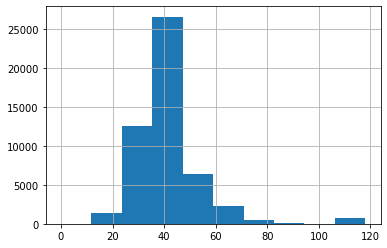

In [17]:
ins_data2['Age'].hist()

In [18]:
ins_data2[['Agency Type', 'Claim']].groupby(['Agency Type'], as_index=False).mean().sort_values(by='Claim', ascending=False)

,Agency Type,Claim
0,Airlines,0.041998
1,Travel Agency,0.009132


In [19]:
ins_data2['Agency Type'].value_counts()

Travel Agency    36684
Airlines         14072
Name: Agency Type, dtype: int64

In [0]:
#ins_data2['Agency Type'] = ins_data2['Agency Type'].map( {'Travel Agency': 0, 'Airlines': 1} ).astype(int)

In [0]:
#test_data['Agency Type'] = test_data['Agency Type'].map( {'Travel Agency': 0, 'Airlines': 1} ).astype(int)

In [23]:
pd.crosstab(index=ins_data2['Distribution Channel'],columns=ins_data2['Claim'],normalize=True)

Claim,0,1
Distribution Channel,,
Offline,0.017220,0.000335
Online,0.964536,0.017909


In [0]:
#ins_data2['Distribution Channel'] = ins_data2['Distribution Channel'].map( {'Online': 0, 'Offline': 1} ).astype(int)

In [0]:
#test_data['Distribution Channel'] = test_data['Distribution Channel'].map( {'Online': 0, 'Offline': 1} ).astype(int)

In [26]:
ins_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50756 entries, 0 to 62287
Data columns (total 10 columns):
Age                     50756 non-null int64
Agency                  50756 non-null object
Agency Type             50756 non-null int64
Commision (in value)    50756 non-null float64
Destination             50756 non-null object
Distribution Channel    50756 non-null int64
Duration                50756 non-null int64
Net Sales               50756 non-null float64
Product Name            50756 non-null object
Claim                   50756 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 4.3+ MB


In [27]:
ins_data2['Destination'].value_counts()

SINGAPORE                   10743
MALAYSIA                     4782
THAILAND                     4740
CHINA                        3796
AUSTRALIA                    2978
                            ...  
CAYMAN ISLANDS                  2
NORTHERN MARIANA ISLANDS        2
ZAMBIA                          2
LATVIA                          1
TURKMENISTAN                    1
Name: Destination, Length: 102, dtype: int64

In [0]:
a=ins_data2['Agency'].value_counts()/ins_data2['Agency'].value_counts().sum()
a=a.to_dict()
ins_data2['Agency']= ins_data2['Agency'].map(a)

In [0]:
a=test_data['Agency'].value_counts()/test_data['Agency'].value_counts().sum()
a=a.to_dict()
test_data['Agency']= test_data['Agency'].map(a)

In [0]:
b=ins_data2['Destination'].value_counts()/ins_data2['Destination'].value_counts().sum()
b=b.to_dict()
ins_data2['Destination']= ins_data2['Destination'].map(b)

In [0]:
b=test_data['Destination'].value_counts()/test_data['Destination'].value_counts().sum()
b=b.to_dict()
test_data['Destination']= test_data['Destination'].map(b)

In [0]:
c=ins_data2['Product Name'].value_counts()/ins_data2['Product Name'].value_counts().sum()
c=c.to_dict()
ins_data2['Product Name']= ins_data2['Product Name'].map(c)

In [0]:
c=test_data['Product Name'].value_counts()/test_data['Product Name'].value_counts().sum()
c=c.to_dict()
test_data['Product Name']= test_data['Product Name'].map(c)

In [0]:
ins_data2= pd.get_dummies(ins_data2, columns=['Agency Type','Distribution Channel'],drop_first=True)

In [224]:
ins_data2.columns

Index(['Age', 'Agency', 'Commision (in value)', 'Destination', 'Duration',
       'Net Sales', 'Product Name', 'Claim', 'Agency Type_Travel Agency',
       'Distribution Channel_Online'],
      dtype='object')

In [0]:
test_data= pd.get_dummies(test_data, columns=['Agency Type','Distribution Channel'],drop_first=True)

In [0]:
#ins_data2.drop(columns=['AgeBand'],inplace=True)

In [0]:
x=ins_data2.drop(['Claim'],axis=1)

In [0]:
y=ins_data2['Claim']

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

Logistic_regression

In [194]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
conf_matrix=confusion_matrix(Y_test, Y_pred)
acc_log = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_log= round(precision_score(Y_test, Y_pred) * 100, 2)
F1_log = round(f1_score(Y_test,Y_pred)*100,2)
Recall_log = round(recall_score(Y_test,Y_pred)*100,2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [196]:
Recall_log

24.56

In [197]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,Duration,4.361100
5,Product Name,0.009491
2,Destination,0.004113
4,Net Sales,-0.002084
0,Agency,-0.012423
1,Commision (in value),-0.326557
7,Distribution Channel_Online,-0.526515
6,Agency Type_Travel Agency,-1.469183


SVM

In [198]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_svc=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_svc = round(f1_score(Y_test,Y_pred)*100,2)
Recall_svc = round(recall_score(Y_test,Y_pred)*100,2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KNN

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_knn=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_knn = round(f1_score(Y_test,Y_pred)*100,2)
Recall_knn = round(recall_score(Y_test,Y_pred)*100,2)

In [0]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_guassian=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_guassian = round(f1_score(Y_test,Y_pred)*100,2)
Recall_guassian= round(recall_score(Y_test,Y_pred)*100,2)

In [0]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_perceptron=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_perceptron = round(f1_score(Y_test,Y_pred)*100,2)
Recall_perceptron = round(recall_score(Y_test,Y_pred)*100,2)

In [203]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_linear_svc=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_linear_svc = round(f1_score(Y_test,Y_pred)*100,2)
Recall_linear_svc = round(recall_score(Y_test,Y_pred)*100,2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_sgd=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_sgd = round(f1_score(Y_test,Y_pred)*100,2)
Recall_sgd = round(recall_score(Y_test,Y_pred)*100,2)

In [0]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_decision_tree=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_decision_tree = round(f1_score(Y_test,Y_pred)*100,2)
Recall_decision_tree = round(recall_score(Y_test,Y_pred)*100,2)

In [0]:
#kfold
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True)
rf_reg = RandomForestClassifier(criterion='gini')


In [207]:
scores = []
for i in range(12):
    result = next(kf.split(x), None)
    x_train = x.iloc[result[0]]
    x_test = x.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = rf_reg.fit(x_train,y_train)
    predictions = rf_reg.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores from each Iteration:  [0.9895649381923263, 0.9873173864183657, 0.9913308717290095, 0.9873173864183657, 0.9886819714239846, 0.9900465564296035, 0.9898057473109648, 0.9897254776047519, 0.9906887140793065, 0.9898057473109648, 0.9910097929041579, 0.989645207898539]
Average K-Fold Score : 0.989578316476695


In [0]:
accuracy_score(y_test,predictions)
acc_kfold_rf = round(accuracy_score(y_test,predictions) * 100, 2)
prec_kfold_rf=round(precision_score(y_test,predictions) * 100, 2)
F1_kfold_rf = round(f1_score(y_test,predictions)*100,2)
Recall_kfold_rf = round(recall_score(y_test,predictions)*100,2)

In [209]:
precision_score(y_test,predictions)

0.9503464203233256

In [0]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_random_forest=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_random_forest = round(f1_score(Y_test,Y_pred)*100,2)
Recall_random_forest = round(recall_score(Y_test,Y_pred)*100,2)


In [0]:
test_pred_rf = random_forest.predict(test_data)

In [217]:
from sklearn.ensemble import VotingClassifier
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [220]:
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, Y_train)
Y_pred=eclf1.predict(X_test)
acc_Voting_class = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_Voting_class=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_Voting_class = round(f1_score(Y_test,Y_pred)*100,2)
Recall_Voting_class = round(recall_score(Y_test,Y_pred)*100,2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
#XGB classifier
model_xgb=XGBClassifier()
model_xgb.fit(X_train,Y_train)
pred_xgb=model_xgb.predict(X_test)
acc_xgb = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_xgb=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_xgb = round(f1_score(Y_test,Y_pred)*100,2)
Recall_xgb = round(recall_score(Y_test,Y_pred)*100,2)

In [0]:
#Adaboost classifier
model_ada=AdaBoostClassifier()
model_ada.fit(X_train,Y_train)
pred_ada=model_ada.predict(X_test)
acc_ada = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_ada=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_ada = round(f1_score(Y_test,Y_pred)*100,2)
Recall_ada = round(recall_score(Y_test,Y_pred)*100,2)

In [228]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','K_fold_RF','VotingClassifier','XGB','Adaboost'],
    'Acc_Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_kfold_rf,acc_Voting_class,acc_xgb,acc_ada],
    'Precision':[prec_svc, prec_knn, prec_log, 
              prec_random_forest, prec_guassian, prec_perceptron, 
              prec_sgd, prec_linear_svc, prec_decision_tree,prec_kfold_rf,prec_Voting_class,prec_xgb,prec_ada],
    'Recall':[Recall_svc, Recall_knn, Recall_log, 
              Recall_random_forest, Recall_guassian, Recall_perceptron, 
              Recall_sgd, Recall_linear_svc, Recall_decision_tree,Recall_kfold_rf,Recall_Voting_class,Recall_xgb,Recall_ada],
    'F1':[F1_svc, F1_knn, F1_log, F1_random_forest, F1_guassian, F1_perceptron, 
              F1_sgd, F1_linear_svc, F1_decision_tree,F1_kfold_rf,F1_Voting_class,F1_xgb,F1_ada]})
models.sort_values(by='Acc_Score', ascending=False)

,Model,Acc_Score,Precision,Recall,F1
9,K_fold_RF,98.96,95.03,100.00,97.45
3,Random Forest,98.85,94.70,100.00,97.28
8,Decision Tree,97.84,90.48,100.00,95.00
1,KNN,96.23,84.62,99.77,91.57
0,Support Vector Machines,95.37,88.07,89.61,88.83
10,VotingClassifier,86.07,76.88,46.00,57.56
11,XGB,86.07,76.88,46.00,57.56
12,Adaboost,86.07,76.88,46.00,57.56
2,Logistic Regression,81.89,65.90,24.56,35.79
7,Linear SVC,81.53,60.54,29.02,39.23


In [215]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Duration,0.273
Age,0.193
Net Sales,0.178
Destination,0.142
Commision (in value),0.098
Agency,0.041
Agency Type_Travel Agency,0.038
Product Name,0.035
Distribution Channel_Online,0.003


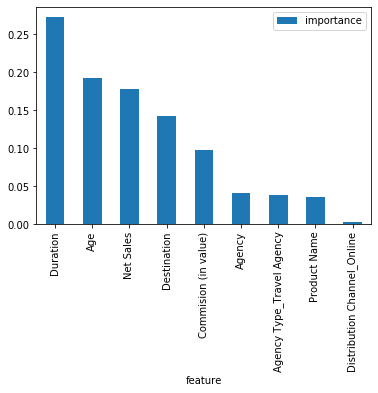

In [216]:
importances.plot.bar()

In [91]:
len(test_pred_rf)

15572

In [0]:
sample_data.drop_duplicates(subset='ID',inplace=True)

In [0]:
sample_data['Claim']=test_pred_rf

In [0]:
sample_data.to_csv('RF_sub.csv',index=False)